# Trabajo práctico 1 (Parte 2) - Organización de datos
### Facultad de ingeniería - Universidad de Buenos Aires


---


Alumna: Agustina Bocaccio \\
Padron: 106393 \\
Email: abocaccio@fi.uba.ar \\

---

#### Segundo cuatrimestre 2021
#### Fecha de entrega: 14/10

## Imports

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Parte 2

### Parte a)

#### Bar chart


La variable a predecir en este dataset es la venta de SKU, por lo que es conveniente saber los mas vendidos. Con este bar chart se muestran 

In [ ]:
id='10CSjcscRpZJa9Al2G07Tr3UpdoxM7Rzc'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_data.parquet')

meli_data = pd.read_parquet('train_data.parquet')

In [ ]:
meli_data

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,1440.000000
...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,22057.00,ARG,classic,drop_off,free_shipping,267.710767
37660275,6707,2021-03-31,0,26999.00,ARG,classic,cross_docking,free_shipping,266.083333
37660276,170355,2021-03-31,0,3400.00,ARG,classic,drop_off,paid_shipping,0.252633
37660277,246568,2021-03-31,0,6289.00,ARG,classic,fulfillment,free_shipping,135.416667


In [ ]:
meli_sku = meli_data.loc[:, ['sku', 'sold_quantity']].groupby('sku').sum()
meli_sku

,sold_quantity
sku,
0,11
1,22
2,1
3,8
4,39
...,...
660911,19
660912,14
660913,10


In [ ]:
meli_series=meli_sku.squeeze().nlargest(10)
meli_series

sku
526920    137528
335101     95731
115        68160
578318     66711
535060     59749
492681     52741
476143     51599
287058     51357
232892     47692
342848     46621
Name: sold_quantity, dtype: int64

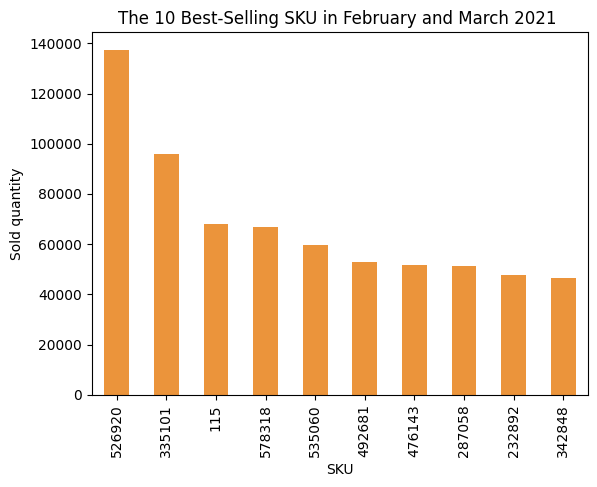

In [ ]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
meli_series.plot.bar(color= {'#EB943B'})
plt.ylabel("Sold quantity")
plt.xlabel("SKU")
plt.title("The 10 Best-Selling SKU in February and March 2021 ")
plt.show()

#### Pie chart

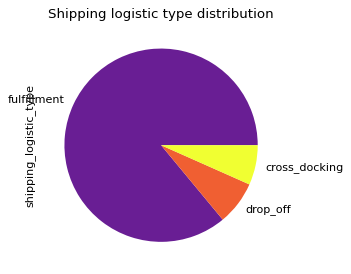

In [ ]:
plt.figure(dpi=80)
meli_data['shipping_logistic_type'].value_counts().plot.pie(colors={'#691E94', '#F05F32', '#F0FF32'}, subplots=True)
plt.title("Shipping logistic type distribution")
plt.show()

#### Violin plot

In [ ]:
id='1mtJARQUFJj-xcVxjdDyk_vJ75cVhcK6c'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('dengue_features_train.csv')
dengue_data = pd.read_csv('dengue_features_train.csv')

In [ ]:
dengue_data.loc[dengue_data['city']=='sj', ['city']] ='San Juan'
dengue_data.loc[dengue_data['city']=='iq', ['city']] ='Iquitos'
dengue_humidity = dengue_data.loc[:, ['reanalysis_relative_humidity_percent', 'city']]

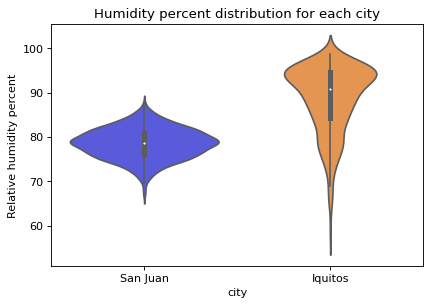

In [ ]:
plt.figure(dpi=80)
plt.title("Humidity percent distribution for each city")
sns.violinplot(data=dengue_data, y='reanalysis_relative_humidity_percent', x='city', palette=['#4346F0', "#FC933A"])
plt.ylabel('Relative humidity percent')

plt.show()

#### Box plot

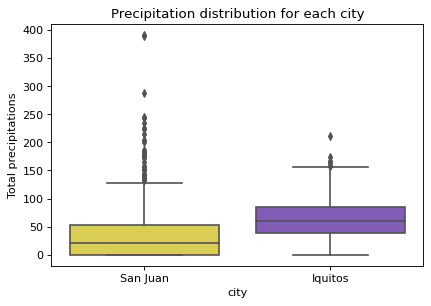

In [ ]:
plt.figure(dpi=80)
plt.title("Precipitation distribution for each city")
sns.boxplot(data=dengue_data, y='precipitation_amt_mm', x='city', palette=['#F0DF3E', "#7F4EC7"])
plt.ylabel('Total precipitations')
plt.show()

#### Histograma

Text(0.5, 1.0, 'Temperature distribution in Iquitos')

<Figure size 600x400 with 0 Axes>

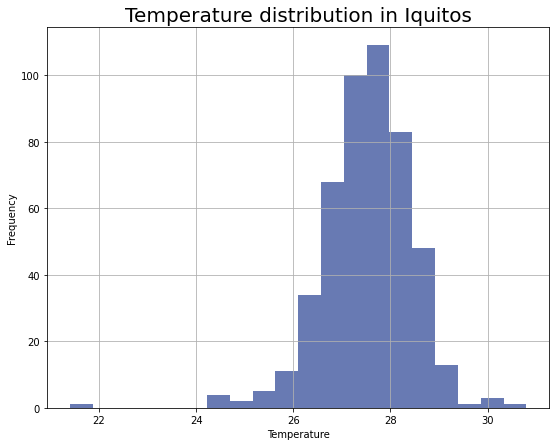

In [ ]:
plt.figure(dpi=100)
iquitos_temp = dengue_data.loc[dengue_data['city']=='Iquitos', ['city', 'station_avg_temp_c']]
iquitos_temp.hist(bins=20, column=['station_avg_temp_c'], figsize = (9,7), color={'#687AB3'})
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title('Temperature distribution in Iquitos', size= 20)

#### Heatmap

In [ ]:
id='1BDD0tlAqXE-h5uX9kxmH_CrjwQPp9jtX'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('training_set_features.csv')

flu_data = pd.read_csv('training_set_features.csv')

In [ ]:
flu_data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [ ]:
people_by_age_and_opinion = pd.pivot_table(data = flu_data, index = 'age_group', values = 'respondent_id', columns = 'opinion_seas_risk', aggfunc= 'count')
people_by_age_and_opinion= people_by_age_and_opinion.apply(lambda row: (row/row.sum())*100, axis=1)
people_by_age_and_opinion.sort_index(inplace = True,ascending = False)
people_by_age_and_opinion

opinion_seas_risk,1.0,2.0,3.0,4.0,5.0
age_group,,,,,
65+ Years,22.258690,30.434134,5.340892,31.791735,10.174549
55 - 64 Years,21.936543,33.369803,2.461707,30.306346,11.925602
45 - 54 Years,24.447031,35.195964,1.474583,26.930539,11.951882
35 - 44 Years,21.840915,37.137537,1.250333,27.853152,11.918063
18 - 34 Years,23.522482,36.795602,1.197722,27.527980,10.956214


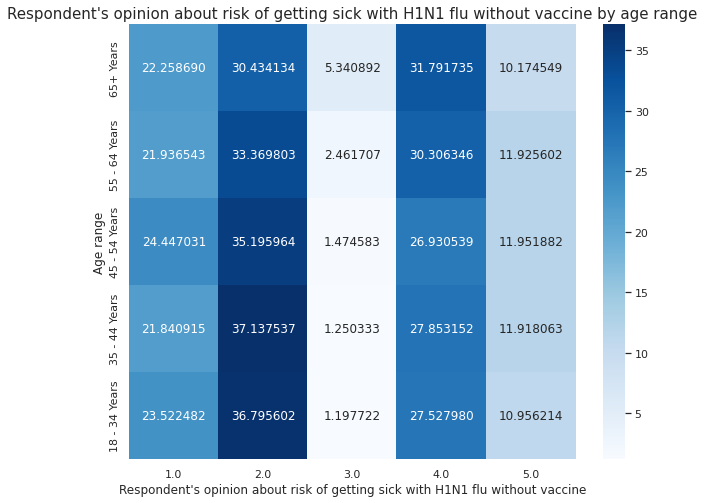

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})

people_by_age_and_opinion.sort_index(ascending =  False, inplace = True)
g = sns.heatmap(people_by_age_and_opinion, cmap="Blues", annot=True, fmt='f')
g.set_ylabel("Age range")
g.set_xlabel("Respondent's opinion about risk of getting sick with H1N1 flu without vaccine")
g.set_title("Respondent's opinion about risk of getting sick with H1N1 flu without vaccine by age range", size=15)
plt.show()

### Parte b)

La visualizacion realizada tiene como objetivo analizar la cantidad de libros que leen en promedio las personas segun su rango etario. Para esto, se selecciono un dataset que contiene informacion de personas con respecto a la lectura en los ultimos 12 meses desde que se les hizo la encuesta.

Los datos fueron obtenidos como parte de un proyecto para General Assembly Data Science Immersive course.

Fuente: https://www.kaggle.com/bilalyussef/google-books-dataset


In [ ]:
id='1cAkI78EgYrXtPvRizX8vJygACS_aB4zw'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('books.csv')
books = pd.read_csv('books.csv')

In [ ]:
books

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,Never been married,High school graduate,Employed part-time,"$75,000 to under $100,000",0,NaN,NaN,NaN,NaN,Yes,Yes
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,NaN,NaN,NaN,NaN,Yes,No
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,Yes
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,No


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

Agrupo por edad y por cantidad de libros leidos, posteriormente agrupo por rango etario y calculo el promedio

In [ ]:
books_short = books.loc[:, ['How many books did you read during last 12months?', 'Age']].groupby('Age').count()
books_short.dropna(inplace=True)
books_short

,How many books did you read during last 12months?
Age,
16,68
17,68
18,59
19,34
20,34
...,...
89,2
90,2
91,3


In [ ]:
bins = [0, 20, 40, 60, 80, 100]
categorias_anios = pd.cut(books_short.index, bins=bins)
categorias_anios

[(0, 20], (0, 20], (0, 20], (0, 20], (0, 20], ..., (80, 100], (80, 100], (80, 100], (80, 100], (80, 100]]
Length: 78
Categories (5, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]

In [ ]:
books_short['Age_gap'] = categorias_anios


In [ ]:
books_short['Age_gap'] = categorias_anios
books_by_age_range = books_short.groupby('Age_gap').mean()
books_by_age_range

,How many books did you read during last 12months?
Age_gap,
"(0, 20]",52.600000
"(20, 40]",41.300000
"(40, 60]",49.500000
"(60, 80]",32.900000
"(80, 100]",7.307692


Como base, hago un bar chart con la biblioteca matplotlib.pyplot

<Figure size 640x480 with 0 Axes>

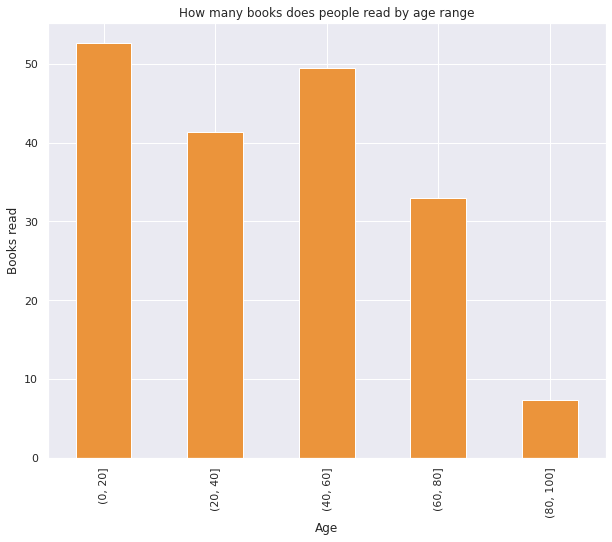

In [ ]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
books_by_age_range.plot.bar(color= {'#EB943B'}, legend=False)
plt.ylabel("Books read")
plt.xlabel("Age")
plt.title("How many books does people read by age range")
plt.show()

Modifico el bar chart para que tenga una metafora sobre lo que se quiere mostrar. En este caso, la cantidad de libros que se lee por edad esta representada por cuantos libros hay en el estante, y cada estante corresponde a un rango etario diferente.


<img src= "https://drive.google.com/uc?id=1WTs1s4Fg0Cahwrh3x-l2-XNBjIyvl2Fz" width="45%">